## Shrinkage Methods : L2 (Ridge) and L1 (Lasso) regularization for multivariate linear regression

Last week, you observed the effects of overfitting of given data because of high model complexity on "data_poly1.npz" and "data_poly2.npz". You saw how overfitting occured due to the least squares regression model describing random errors or noise in the data instead of the underlying distribution thus causing an increase in test error. (although the training error reduced with increasing complexity). This week we will explore the two main explanations of the overfitting phenomenon :
- High model complexity
- Multicollinearity of predictors

Then we will go on to look at the two most widely used techniques to reduce overfitting of data on using linear regression models: Ridge and Lasso regression.

In [8]:
import random
import matplotlib.pyplot as plt
from math import *
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

### Overfitting of data due to high model complexity

#### Ridge regression
Last week you fit a $9$th order polynomial to the given dataset "data_poly1.npz" containing 10 distinct points. The polynomial fit all the data points exactly and thus wrongly modelled the noise too. 
- Now use polynomial regression of order 9 along with L2 norm regularization (Ridge regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

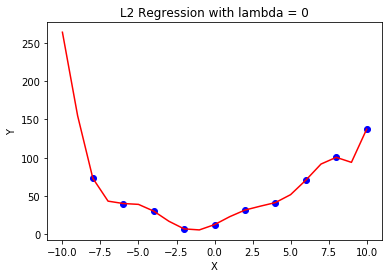

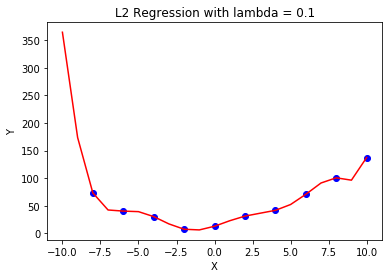

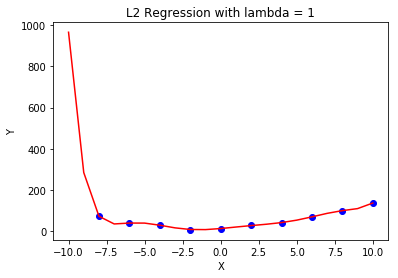

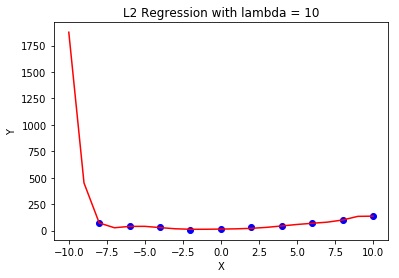

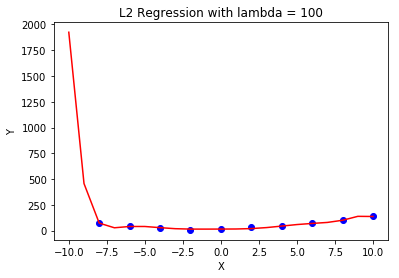

In [9]:
data = np.load('data_poly1.npz')
lst = data.files
X = []
Y = []

for items in lst:
    if items == 'x':
        X = data[items]
    else:
        Y = data[items]
        
X = np.array(X);
X = X.reshape(-1, 1)

poly = PolynomialFeatures(degree = 9) 
X_poly = poly.fit_transform(X)

for reg_coeff in [0, 0.1, 1, 10, 100]:
    reg = Ridge(alpha=reg_coeff)
    reg.fit(X_poly, Y)
    
    X_plot = np.arange(-10,11,1).reshape(-1,1)

    plt.scatter(X, Y, color = 'blue')
    plt.plot(X_plot, reg.predict(poly.fit_transform(X_plot)), color = 'red') 
    plt.title('L2 Regression with lambda = ' + str(reg_coeff)) 
    plt.xlabel('X') 
    plt.ylabel('Y') 
    plt.show()
    

#### Lasso regression
- Now use polynomial regression of order 9 along with L1 norm regularization (Lasso regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

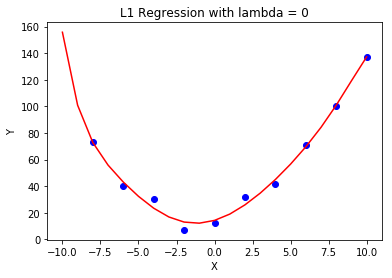

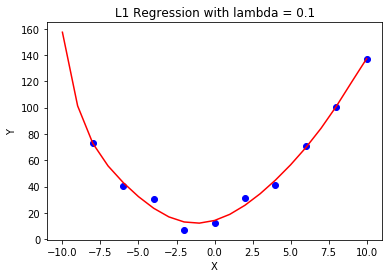

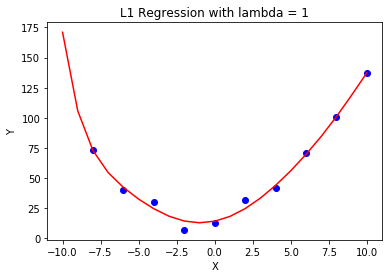

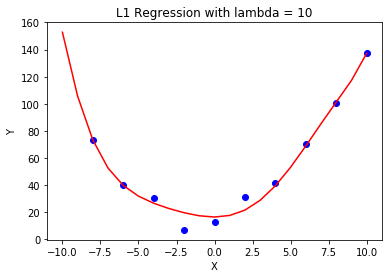

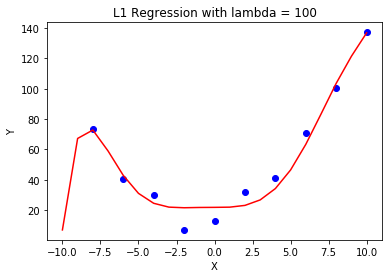

In [10]:
for reg_coeff in [0, 0.1, 1, 10, 100]:
    reg = Lasso(alpha=reg_coeff)
    reg.fit(X_poly, Y)
    
    X_plot = np.arange(-10,11,1).reshape(-1,1)

    plt.scatter(X, Y, color = 'blue')
    plt.plot(X_plot, reg.predict(poly.fit_transform(X_plot)), color = 'red') 
    plt.title('L1 Regression with lambda = ' + str(reg_coeff)) 
    plt.xlabel('X') 
    plt.ylabel('Y') 
    plt.show()

Plot the training and validation set ("data_poly2.npz") mean square errors vs $\lambda$ for ridge and lasso regression. Compare with least squares polynomial regression of order $9$ from the previous week.  

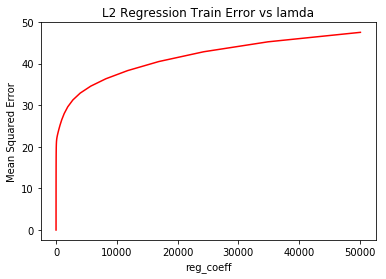

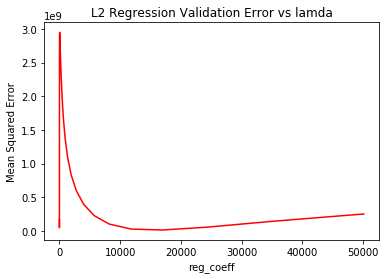

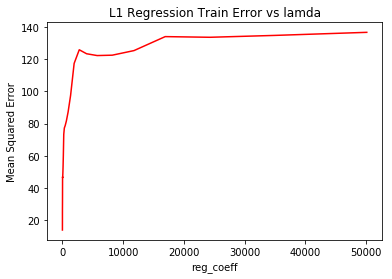

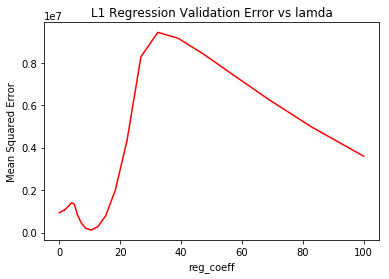

In [11]:
data = np.load('data_poly2.npz')
lst = data.files
X_test = []
Y_test = []

for items in lst:
    if items == 'x':
        X_test = data[items]
    else:
        Y_test = data[items]
        
X_test = np.array(X_test)
X_test = X_test.reshape(-1, 1)

X_test_poly = poly.fit_transform(X_test)

train_error = []
test_error = []

reg_array = np.logspace(-3, 4.7, 50)

for reg_coeff in reg_array:
    reg = Ridge(alpha=reg_coeff)
    reg.fit(X_poly, Y)
    train_error += [mean_squared_error(Y, reg.predict(X_poly))]

# plt.plot(test_error)
# plt.scatter(reg_array, train_error, color='blue')
plt.plot(reg_array, train_error, color='red')
plt.xlabel("reg_coeff")
plt.ylabel("Mean Squared Error")
plt.title("L2 Regression Train Error vs lamda")
# plt.xlim(0, 12)
plt.show()

reg_array = np.logspace(-3, 4.7, 50)

train_error = []
test_error = []

for reg_coeff in reg_array:
    reg = Ridge(alpha=reg_coeff)
    reg.fit(X_poly, Y)
    test_error += [mean_squared_error(Y_test, reg.predict(X_test_poly))]

# plt.plot(test_error)
# plt.scatter(reg_array, test_error, color='blue')
plt.plot(reg_array, test_error, color='red')
plt.xlabel("reg_coeff")
plt.ylabel("Mean Squared Error")
plt.title("L2 Regression Validation Error vs lamda")
# plt.xlim(0, 12)
plt.show()

#--------------- L1 Regression ------------------

train_error = []
test_error = []

reg_array = np.logspace(-3, 4.7, 50)

for reg_coeff in reg_array:
    reg = Lasso(alpha=reg_coeff)
    reg.fit(X_poly, Y)
    train_error += [mean_squared_error(Y, reg.predict(X_poly))]

# plt.plot(test_error)
# plt.scatter(reg_array, train_error, color='blue')
plt.plot(reg_array, train_error, color='red')
plt.xlabel("reg_coeff")
plt.ylabel("Mean Squared Error")
plt.title("L1 Regression Train Error vs lamda")
# plt.xlim(0, 12)
plt.show()

reg_array = np.logspace(-2, 2, 50)

train_error = []
test_error = []

for reg_coeff in reg_array:
    reg = Lasso(alpha=reg_coeff)
    reg.fit(X_poly, Y)
    train_error += [mean_squared_error(Y, reg.predict(X_poly))]
    test_error += [mean_squared_error(Y_test, reg.predict(X_test_poly))]

# plt.plot(test_error)
# plt.scatter(reg_array, test_error, color='blue')
plt.plot(reg_array, test_error, color='red')
plt.xlabel("reg_coeff")
plt.ylabel("Mean Squared Error")
plt.title("L1 Regression Validation Error vs lamda")
# plt.xlim(0, 12)
plt.show()


### Observations:

- We see that Validation Error goes down with increase in lamda, This is because more the value of lamda, less is the overfitting. 

- However, the validation Error reaches a minima and then starts increasing this is because we give more and more value to our assumption of w. That is the weights/coefficients are small. For infinite lamda our coefficients will all be zero.

- We may not Train Error equal to zero at the optimal value of lamda and that is actually good. This depicts that we are not modelling the noise.

#### Observations and inferences:
- Explain how the variances of the least squares estimates vary as the number of features increase. Comment for the following three cases :
 - n>>p
 - n~p
 - n<p

n : number of data points <br>
p : number of features <br>
- Why do ridge and lasso regression improve over least squares regression? Make arguments based on the training and validation set error plots.
- What can you say about the model complexity as $\lambda$ increases?

### Solution:

- For n>>p, We actually have a large Bias and very less variance. This means that the Train Error will be significantly high and comparable to Validation Error. We are overfitting the data. We are using very naive model.

- For n~p, We can achieve zero Train Error depicting that we modelled the noise in the data. We can decrease the complexity of the model by using appropriate regularisation.

- For n<p, We cannot use Linear Regression.

Ridge and lasso regression are better than least squares regression because they make the model less complex and hence we do not model the noise in the data. They have ||w||^2 and ||w|| in their loss function respectively which decreases the value of coefficients. Least Squares Regression just minimises the training error and hence we can reach zero Train Error. But this makes the Test Error overshoot because of our complex model.

Model Complexity decreases as lamda increases. Moreover, when lamda becomes infinity model just outputs all coefficients to be zero

### Overfitting of data due to multicollinearity

The coefficient estimates of least squares regression can also change erratically in responses to small changes in data when the predictors are highly correlated. 

#### Uncorrelated features
The three columns of $X$ contain the three features. $Y$ is generated as a linear combination of two features as shown. 
- Compute the correlations between the features.
- Fit a linear regression, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model and compare the coefficients with the expected coefficients. 
- Does the linear regression model recover the underlying structure of the data? (despite significant noise in the data)
- How often do you think that real life datasets have uncorrelated features? 
- Which of the two methods (ridge and lasso regression) performs feature selection? Which model results in sparser weights?



In [12]:
import numpy as np

np.random.seed(0)
size = 5000
X = np.random.normal(0, 1, (size, 3))
#Y = X0 + 2*X1 + noise
#X0,X1 and X2 are the features
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)

# print(X[:, 0])

print("Correlation Matrix: ")
print(np.corrcoef(X[:, 0:3].T))

print()

print("Expected Coefficients: [1, 2, 0]")

reg = Lasso(alpha = 0.1)
reg.fit(X, Y)

print("Coeff for Lasso: ", reg.coef_)

reg = Ridge(alpha = 1)
reg.fit(X, Y)

print("Coeff for Ridge: ", reg.coef_)

reg = LinearRegression()
reg.fit(X, Y)

print("Coeff for Linear Model: ", reg.coef_)

Correlation Matrix: 
[[ 1.          0.01568331 -0.01206625]
 [ 0.01568331  1.          0.01373401]
 [-0.01206625  0.01373401  1.        ]]

Expected Coefficients: [1, 2, 0]
Coeff for Lasso:  [ 0.88555304  1.89248636 -0.        ]
Coeff for Ridge:  [ 0.98403693  1.99481277 -0.04073156]
Coeff for Linear Model:  [ 0.98422873  1.99522378 -0.04074316]


### Observations:
- We see that Linear Regression Model also models the noise and hence, we do not get the exact expected coefficients. But the predicted coefficients are pretty close to the actual ones this is because when the Noise is assumed to be normal distrbuted. Maximum Likelyhood Estimate of W turns out to be the same as Linear Regression one.

- Most of Real Life Datasets will have correlated features. This because the features like "number of hours worked" will be strongly correlated to the feature "number of projects". In Real Life Datasets we are expected to encounter such features.

- Lasso Regression seems to perform Feature Selection as it allows the coefficients to be zero. Lasso Regression seems to result in sparser weights. This is also true theoritically. If we compare the constraint versions of Lasso and Ridge regressions we see that for Lasso we have polyhedral constraint with the sharp corners at the axis. Whereas for Ridge Regression we have Ball constraint.

#### Correlated features
The three columns of $X$ contain three features. $Y$ is generated as a linear combination of the three features using 10 different random seeds as shown.
- Compute the correlations between the features.
- Fit a linear, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model corresponding to data generated from each random seed and compare the coefficients with the expected coefficients.
- Compare the stability of the three models. Here stability is wrt fluctuations in coefficients on minor changes in data achieved through a different random seed in each iteration.
- Do you expect lasso and ordinary linear regression models to be stable for datsets with correlated features? Explain giving reasons.

In [13]:
size = 100
 
#We run the method 10 times with different random seeds
for i in range(10):
#     print("Random seed %s" % i)
    print()
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    #X0,X1 and X2 are the features
    X0 = X_seed + np.random.normal(0, .1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    Y = X0 + X1 + X2 + np.random.normal(0, 1, size)
    X = np.array([X0, X1, X2]).T
    
    print("Correlation Matrix: ")
    print(np.corrcoef(X[:, 0:3].T))

    print()

    print("Expected Coefficients: [1, 1, 1]")

    reg = Lasso(alpha = 0.1)
    reg.fit(X, Y)

    print("Coeff for Lasso: ", reg.coef_)

    reg = Ridge(alpha = 10)
    reg.fit(X, Y)

    print("Coeff for Ridge: ", reg.coef_)
    
    reg = LinearRegression()
    reg.fit(X, Y)

    print("Coeff for Linear Model: ", reg.coef_)
    
    print()
    print("-------------------------------------------")



Correlation Matrix: 
[[1.         0.99107886 0.9914997 ]
 [0.99107886 1.         0.99254973]
 [0.9914997  0.99254973 1.        ]]

Expected Coefficients: [1, 1, 1]
Coeff for Lasso:  [0.68342507 2.1773519  0.        ]
Coeff for Ridge:  [0.93832131 1.05887277 0.87652644]
Coeff for Linear Model:  [ 0.7284403   2.30926001 -0.08219169]

-------------------------------------------

Correlation Matrix: 
[[1.         0.99061655 0.98680909]
 [0.99061655 1.         0.98560791]
 [0.98680909 0.98560791 1.        ]]

Expected Coefficients: [1, 1, 1]
Coeff for Lasso:  [0.85351108 1.95094851 0.        ]
Coeff for Ridge:  [0.98409577 1.06792673 0.75855367]
Coeff for Linear Model:  [ 1.15181561  2.36579916 -0.59900864]

-------------------------------------------

Correlation Matrix: 
[[1.         0.99079128 0.98962272]
 [0.99079128 1.         0.991474  ]
 [0.98962272 0.991474   1.        ]]

Expected Coefficients: [1, 1, 1]
Coeff for Lasso:  [0.76397325 0.26686705 1.97766971]
Coeff for Ridge:  [0.971

We see that Lasso and Ordinary Least Square Regression Models are highly unstable. There is a large flactuation in the weights with minor change in the data. Compared to these two Ridge Regression is pretty stable and accurate.

Lasso and Ordinary Least Square Regression won't be stable for corellated features. We can explain this theoritically by NO Free Lunch Theorem which says "If an algorithm is sparse, in the sense that it identifies redundant features, then that algorithm is not stable (and the uniform stability bound β does not go to zero). If an algorithm is stable, then there is no hope that it will be sparse."